In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

In [2]:
import numpy as np
import torch
import random

In [3]:
def show_state(env, episode,step, info=""):
    plt.figure(99999,figsize=[8,6])
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("episode: {} step: {} ".format(episode,step))
    #plt.title("%s | Step: %d %s" % (env._spec.id,step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

In [4]:
import gym

In [5]:
env = gym.make('CartPole-v1')

In [6]:
seed_value=23
env.seed(seed_value)
torch.manual_seed(seed_value)
random.seed(seed_value)

In [7]:
env = gym.wrappers.Monitor(env, '../mp4/cartpole-5',video_callable=lambda episode_id: True)
#env = gym.wrappers.Monitor(env, '../mp4/cartpole-5',video_callable=lambda episode_id: episode_id%10==0)

In [8]:
%%time

num_episodes=1000

steps_total=np.full([num_episodes],-999,dtype=np.int32)

for i_episode in range(num_episodes):
    
    state = env.reset()
    #for step in range(100):
    step=0
    while True:
        
        step+=1
        
        action=env.action_space.sample()
        
        new_state, reward, done, info = env.step(action)
        
        #print(new_state)
        #print(info)
            
        #show_state(env.env,i_episode,step)
        #env.render()
        
        if done:
            steps_total[i_episode]=step
            #print("Episode finished after: {}".format(step))
            break
        

CPU times: user 3min 44s, sys: 46.3 s, total: 4min 30s
Wall time: 6min 19s


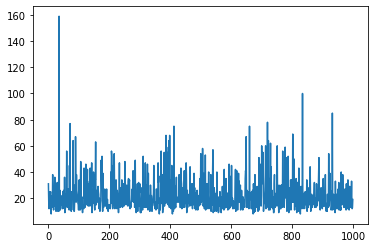

In [13]:
plt.plot(steps_total)
plt.show()

In [14]:
print("Average number of steps: {}". format(np.average(steps_total)))

Average number of steps: 22.638


In [15]:
print("Average number of steps=reward: {}". format(np.average(steps_total)))
print("Average number of steps=reward in last 100 episodes: {}". format(np.average(steps_total[-100:])))



Average number of steps=reward: 22.638
Average number of steps=reward in last 100 episodes: 20.0


plt.figure(1,figsize=[12,5])
plt.title("Rewards")
plt.bar(torch.arange(len(rewards_total)), rewards_total,alpha=0.6, color='green')
#plt.plot(rewards_total)
plt.show()

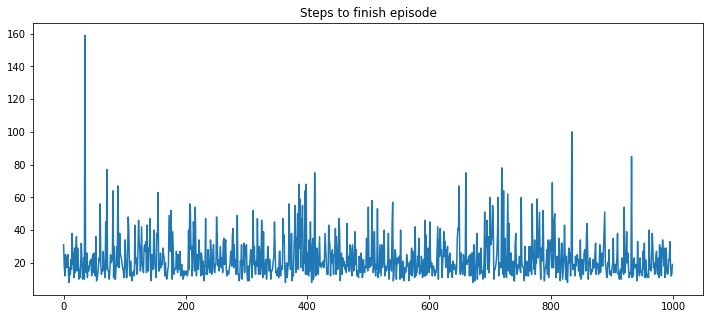

In [16]:
plt.figure(2,figsize=[12,5])
plt.title("Steps to finish episode")
plt.plot(steps_total)
plt.show()